In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy(y_pred, y_true):
    return -(y_true @ np.log(y_pred))

def d_cross_entropy(y, y_pred):
    return -(y - y_pred)

def softmax(L):
    arr = []
    for i in L:
        arr.append(np.exp(i) / np.exp(L).sum())

    return arr

def dsigmoid(x):
    return sigmoid(x) * sigmoid(1- x)

In [ ]:
def initialize_parameters(inputs, hidden_layers, outputs):
    parameters = {}
    parameters["W1"] = np.random.rand(hidden_layers[0], inputs)
    parameters["b1"] = np.random.rand(hidden_layers[0])
    for i in range(1, len(hidden_layers)):
        parameters[f"W{i+1}"] = np.random.rand(hidden_layers[i], hidden_layers[i - 1])
        parameters[f"b{i+1}"] = np.random.rand(hidden_layers[i])
    parameters[f"W{len(hidden_layers) + 1}"] = np.random.rand(outputs, hidden_layers[-1])
    parameters[f"b{len(hidden_layers) + 1}"] = np.random.rand(outputs)
    return parameters

In [ ]:
initialize_parameters(3, [3, 3], 3)

{'W1': array([[0.77598964, 0.11086056, 0.30225126],
        [0.11365554, 0.26429342, 0.52373418],
        [0.79322532, 0.64690812, 0.8974008 ]]),
 'b1': array([0.36480097, 0.9341658 , 0.20235546]),
 'W2': array([[0.14300462, 0.20842507, 0.36226225],
        [0.45635101, 0.68723658, 0.36556873],
        [0.30971569, 0.22668197, 0.01672032]]),
 'b2': array([0.52674602, 0.14504988, 0.01473813]),
 'W3': array([[0.53690854, 0.07699711, 0.46227208],
        [0.16290924, 0.27618729, 0.22235894],
        [0.65722696, 0.43030143, 0.54799411]]),
 'b3': array([0.51138319, 0.89299058, 0.60671539])}

In [ ]:
W1 = np.array([
    [0.5488135, 0.71518937, 0.60276338],
    [0.54488318, 0.4236548, 0.64589411],
    [0.43758721, 0.891773, 0.96366276]
])
W2 = np.array([
    [0.56804456, 0.92559664, 0.07103606],
    [0.0871293, 0.0202184, 0.83261985],
    [0.77815675, 0.87001215, 0.97861834]
])
W3 = np.array([
    [0.11827443, 0.63992102, 0.14335329],
    [0.94466892, 0.52184832, 0.41466194],
    [0.26455561, 0.77423369, 0.45615033]
])

b1 = np.array(
    [0.38344152, 0.79172504, 0.52889492]
)

b2 = np.array(
    [0.7991586, 0.46147936, 0.52889492]
)

b3 = np.array(
    [0.56843395, 0.0187898, 0.6176355]
)

X = np.array(
    [[1, 0, 1]]
)

Y = np.array(
    [[0, 0, 1]]
)

In [ ]:
parameters = {
    'W1': W1,
    'W2': W2,
    'W3': W3,
    'b1': b1,
    'b2': b2,
    'b3': b3,
}

In [ ]:
def forward_propogation(parameters, x, g, O):
    activations = {}
    activations["a1"] = parameters["W1"] @ x + parameters["b1"]
    activations["h1"] = g(activations["a1"])
    for i in range(2, len(parameters) // 2):
        activations[f"a{i}"] = parameters[f"W{i}"] @ activations[f"h{i - 1}"] + parameters[f"b{i}"]
        activations[f"h{i}"] = g(activations[f"a{i}"])

    activations[f"a{len(parameters) // 2}"] = parameters[f"W{len(parameters) // 2}"] @ activations[f"h{len(parameters) // 2 - 1}"] + parameters[f"b{len(parameters) // 2}"]
    y_pred = O(activations[f"a{len(parameters) // 2}"])
    return y_pred, activations

In [ ]:
forward_propogation(parameters, x, sigmoid, softmax)

([0.23756972385440864, 0.3381938464839215, 0.42423642966166986],
 {'a1': array([1.5350184 , 1.98250233, 1.93014489]),
  'h1': array([0.82273938, 0.87894766, 0.87326546]),
  'a2': array([2.14209557, 1.27803313, 2.78840386]),
  'h2': array([0.89492782, 0.78211479, 0.94204596]),
  'a3': array([1.30981811, 1.6629762 , 1.88964787])})

In [ ]:
def backPropogation(y_pred, y, activations, g_dash, O_dash, parameters, x):
    losses = {}
    n = len(parameters) // 2
    m = len(activations) // 2
    La = O_dash(y, y_pred)

    Lh = La @ parameters[f"W{n}"]

    da = g_dash(activations[f"a{m}"])
    losses[f"LW{n}"] = np.outer(La, activations[f"h{m}"])
    losses[f"Lb{n}"] = La.copy()




    for i in range(1, m):
        La = Lh * da
        Lh = La @ parameters[f"W{m - i + 1}"]
        da = g_dash(activations[f"a{m - i}"])
        losses[f"LW{m - i + 1}"] = np.outer(La, activations[f"h{m - i}"])
        losses[f"Lb{m - i + 1}"] = La.copy()

    La = Lh * da
    losses["LW1"] = np.outer(La, x)
    losses["Lb1"] = La.copy()


    return losses

In [ ]:
y_pred, activations = forward_propogation(parameters, x, sigmoid, softmax)

In [ ]:
gradient_loss = backPropogation(y_pred, y, activations, dsigmoid, d_cross_entropy, parameters, x)

In [ ]:
def gradient_descent(parameters, losses, eta):
    new_parameters = {}
    for i in range(len(parameters) // 2):
        new_parameters[f"W{i + 1}"] = parameters[f"W{i + 1}"] - eta * losses[f"LW{i + 1}"]
        new_parameters[f"b{i + 1}"] = parameters[f"b{i + 1}"] - eta * losses[f"Lb{i + 1}"]
    return new_parameters

In [ ]:
new_parameters = gradient_descent(parameters, gradient_loss, 1)

In [ ]:
y_pred, activations = forward_propogation(new_parameters, x, sigmoid, softmax)

In [ ]:
cross_entropy(y_pred, y)

0.07711344018879235

# Backpropogation code

In [ ]:
from scipy.special import expit

# Helper Functions
def sigmoid(x):
    return expit(x)

def cross_entropy(y_pred, y_true, epsilon=1e-15):
    # Clip y_pred to avoid values close to 0 or 1
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true @ np.log(y_pred))

def d_cross_entropy(y, y_pred):
    return -(y - y_pred)

def softmax(L):
    exp_L = np.exp(L - np.max(L))  # Subtract the maximum value to avoid overflow
    return exp_L / exp_L.sum(axis=0, keepdims=True)  # Compute softmax along the specified axis

def dsigmoid(x):
    return sigmoid(x) * sigmoid(1- x)

# Initialize Parameters

def initialize_parameters(inputs, hidden_layers, outputs):
    parameters = {}
    parameters["W1"] = np.random.rand(hidden_layers[0], inputs)
    parameters["b1"] = np.random.rand(hidden_layers[0])
    for i in range(1, len(hidden_layers)):
        parameters[f"W{i+1}"] = np.random.rand(hidden_layers[i], hidden_layers[i - 1])
        parameters[f"b{i+1}"] = np.random.rand(hidden_layers[i])
    parameters[f"W{len(hidden_layers) + 1}"] = np.random.rand(outputs, hidden_layers[-1])
    parameters[f"b{len(hidden_layers) + 1}"] = np.random.rand(outputs)
    return parameters

# Forward Propogation

def forward_propogation(parameters, x, g, O):
    activations = {}

    activations["a1"] = parameters["W1"] @ x + parameters["b1"]
    activations["h1"] = g(activations["a1"])
    for i in range(2, len(parameters) // 2):
        activations[f"a{i}"] = parameters[f"W{i}"] @ activations[f"h{i - 1}"] + parameters[f"b{i}"]
        activations[f"h{i}"] = g(activations[f"a{i}"])

    activations[f"a{len(parameters) // 2}"] = parameters[f"W{len(parameters) // 2}"] @ activations[f"h{len(parameters) // 2 - 1}"] + parameters[f"b{len(parameters) // 2}"]
    y_pred = O(activations[f"a{len(parameters) // 2}"])
    return y_pred, activations

# Backpropogation

def backPropogation(y_pred, y, activations, g_dash, O_dash, parameters, x):
    losses = {}
    n = len(parameters) // 2
    m = len(activations) // 2
    La = O_dash(y, y_pred)


    Lh = La @ parameters[f"W{n}"]

    da = g_dash(activations[f"a{m}"])
    losses[f"W{n}"] = np.outer(La, activations[f"h{m}"])
    losses[f"b{n}"] = La.copy()




    for i in range(1, m):
        La = Lh * da
        Lh = La @ parameters[f"W{m - i + 1}"]
        da = g_dash(activations[f"a{m - i}"])
        losses[f"W{m - i + 1}"] = np.outer(La, activations[f"h{m - i}"])
        losses[f"b{m - i + 1}"] = La.copy()

    La = Lh * da
    losses["W1"] = np.outer(La, x)
    losses["b1"] = La.copy()


    return losses

# Gradient Descent (Batch)
def gradient_descent(parameters, losses, eta):
    for i in range(len(parameters) // 2):
        parameters[f"W{i + 1}"] = parameters[f"W{i + 1}"] - eta * losses[f"W{i + 1}"]
        parameters[f"b{i + 1}"] = parameters[f"b{i + 1}"] - eta * losses[f"b{i + 1}"]
    return parameters

def sgd(parameters, losses, eta):
    new_parameters = {}
    num_samples = len(losses)  # Number of data points or samples

    # Iterate over each sample and update parameters using its corresponding gradient
    for i in range(num_samples):
        for j in range(1, len(parameters) // 2 + 1):  # Iterate over layers
            new_parameters[f"W{j}"] = parameters[f"W{j}"] - eta * losses[f"W{j}"]
            new_parameters[f"b{j}"] = parameters[f"b{j}"] - eta * losses[f"b{j}"]

    return new_parameters


def train(X, Y, epochs, hidden_layers, g, O, g_dash, O_dash, eta, optimizer):
    parameters = initialize_parameters(X[0].shape[0], hidden_layers, Y[0].shape[0])
    print(parameters)
    for _ in range(epochs):
        total_gradient_loss = {key: 0 for key in parameters.keys()}  # Initialize total gradient loss
        for x, y in zip(X, Y):  # Iterate over each data point
            y_pred, activations = forward_propogation(parameters, x, g, O)
            gradient_loss = backPropogation(y_pred, y, activations, g_dash, O_dash, parameters, x)
            # Accumulate the gradients for each data point
            for key in total_gradient_loss:
                total_gradient_loss[key] += gradient_loss.get(key, 0)
        # Update the parameters using the accumulated gradients
        parameters = optimizer(parameters, total_gradient_loss, eta)
    return parameters

def evaluate(X, parameters, g, O):
    return np.array(forward_propogation(parameters, X, g, O)[0])


In [ ]:
parameters = train(X, Y, 300, [3, 4, 5], sigmoid, softmax, dsigmoid, d_cross_entropy, 50, sgd)

{'W1': array([[0.87587277, 0.92672285, 0.87456226, 0.17584757, 0.91949464,
        0.52739797, 0.47525497, 0.74970912, 0.16905386, 0.61531109],
       [0.66824326, 0.57244168, 0.97480688, 0.43733053, 0.11519756,
        0.23291893, 0.03509665, 0.84786526, 0.24456808, 0.32763348],
       [0.21250549, 0.27237536, 0.01871629, 0.74984428, 0.37838721,
        0.4894164 , 0.3338544 , 0.30595014, 0.32448785, 0.49691844]]), 'b1': array([0.47253296, 0.03716997, 0.97390171]), 'W2': array([[0.8867403 , 0.56835411, 0.42025399],
       [0.89992407, 0.22984957, 0.4143102 ],
       [0.56335832, 0.52052592, 0.12128385],
       [0.68321713, 0.1038356 , 0.45412441]]), 'b2': array([0.48048849, 0.13035009, 0.37971717, 0.4911684 ]), 'W3': array([[0.99960946, 0.20740405, 0.81982168, 0.4717515 ],
       [0.18671358, 0.59537892, 0.13991907, 0.0122807 ],
       [0.47032275, 0.37878221, 0.8311686 , 0.18291506],
       [0.60849864, 0.65290657, 0.18513642, 0.85609373],
       [0.37067216, 0.70792865, 0.56724982, 

In [ ]:
def initialize_parameters(inputs, hidden_layers, outputs):
    parameters = {}
    parameters["W1"] = np.random.rand(hidden_layers[0], inputs)
    parameters["b1"] = np.random.rand(hidden_layers[0])
    for i in range(1, len(hidden_layers)):
        parameters[f"W{i+1}"] = np.random.rand(hidden_layers[i], hidden_layers[i - 1])
        parameters[f"b{i+1}"] = np.random.rand(hidden_layers[i])
    parameters[f"W{len(hidden_layers) + 1}"] = np.random.rand(outputs, hidden_layers[-1])
    parameters[f"b{len(hidden_layers) + 1}"] = np.random.rand(outputs)

    # Initialize AdaM parameters
    v = {}
    s = {}
    for key in parameters.keys():
        if key.startswith("W") or key.startswith("b"):
            v[key] = np.zeros_like(parameters[key])
            s[key] = np.zeros_like(parameters[key])

    return parameters, v, s

def adam(parameters, v, s, losses, eta, beta1=0.9, beta2=0.999, epsilon=1e-8, t=0):
    for key in parameters.keys():
        if key.startswith("W") or key.startswith("b"):
            # Compute gradients
            gradient = losses[key]

            # Update time step
            t += 1

            # Update biased first moment estimate
            v[key] = beta1 * v[key] + (1 - beta1) * gradient
            # Update biased second moment estimate
            s[key] = beta2 * s[key] + (1 - beta2) * (gradient ** 2)

            # Correct the bias in the first moment
            v_corrected = v[key] / (1 - beta1 ** t)
            # Correct the bias in the second moment
            s_corrected = s[key] / (1 - beta2 ** t)

            # Update parameters
            parameters[key] -= eta * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s

def train(X, Y, epochs, hidden_layers, g, O, g_dash, O_dash, eta, optimizer):
    parameters, v, s = initialize_parameters(X[0].shape[0], hidden_layers, Y[0].shape[0])

    for _ in range(epochs):
        for x, y in zip(X, Y):
            y_pred, activations = forward_propogation(parameters, x, g, O)
            gradient_loss = backPropogation(y_pred, y, activations, g_dash, O_dash, parameters, x)
            parameters, v, s = optimizer(parameters, v, s, gradient_loss, eta)

    return parameters

# Usage example:
# parameters = train(X, Y, epochs, hidden_layers, sigmoid, softmax, dsigmoid, d_cross_entropy, eta, adam)


In [ ]:
parameters = train(X, Y, 300, [3, 4, 5], sigmoid, softmax, dsigmoid, d_cross_entropy, 50, adam)

In [ ]:
parameters

{'W1': array([[-5.02209439e+02,  4.16844333e-01, -5.01526904e+02],
        [-5.01715984e+02,  8.64809399e-01, -5.01972101e+02],
        [-5.01292146e+02,  2.23744046e-01, -5.01413702e+02]]),
 'b1': array([-373.12904845, -373.29534843, -372.92794635]),
 'W2': array([[-320.74688975, -320.29730294, -320.4841101 ],
        [-320.44501204, -320.837123  , -320.41702322],
        [-320.48737929, -320.38157605, -320.21901062],
        [ 321.11588654,  320.99456354,  321.40881369]]),
 'b2': array([-290.97458564, -291.54261196, -291.54392323,  292.66516015]),
 'W3': array([[ 274.13441419,  274.1853554 ,  274.15825997,  274.60886359],
        [-273.69203896, -273.63974896, -273.86688601, -273.88255217],
        [ 274.44111331,  274.73704266,  274.47631749,  274.19662018],
        [-273.80691887, -273.83440881, -273.10587649, -273.74579177],
        [-273.32720278, -273.34693567, -273.58828681, -273.8477254 ]]),
 'b3': array([ 263.04495981, -262.08388004,  263.01919125, -261.39810496,
        -262

In [ ]:
X[0].shape, Y[0].shape

((3,), (3,))

In [ ]:
Y_pred = []
for x in X:
    y_pred = list(evaluate(x, parameters, sigmoid, softmax))
    Y_pred.append(y_pred)
Y_pred = np.array(Y_pred)

In [ ]:
Y, Y_pred

(array([[0, 0, 1]]), array([[0., 0., 1.]]))

# Testing phase

In [ ]:
# import numpy as np

# # Original data
# y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

# # Create X such that the index of the number of y is maximum in X
# X = np.zeros((len(y), 10))  # Initialize X with zeros

# beta = 0.85
# for i in range(len(y)):
#     max_index = y[i]  # Index of the number in y
#     X[i, max_index] = beta  # Set the highest value in X
#     X[i] += (1 - beta) / 9 # Add a small value to all elements to make sure they are not zero

# print("X:")
# print(X)
# print("Shape of X:", X.shape)
# print("y:", y)
# num_classes = 10
# y_one_hot = np.eye(num_classes)[y]
# y_one_hot

import numpy as np

X = np.array([
    [0.1, 0.5, 0.2, 0.9, 0.3, 0.6, 0.4, 0.8, 0.7, 0.2],
    [0.3, 0.2, 0.7, 0.4, 0.6, 0.8, 0.9, 0.5, 0.1, 0.3],
    [0.8, 0.9, 0.4, 0.1, 0.5, 0.2, 0.7, 0.6, 0.3, 0.9],
    [0.6, 0.2, 0.3, 0.7, 0.4, 0.1, 0.8, 0.9, 0.5, 0.6],
    [0.5, 0.1, 0.8, 0.2, 0.9, 0.7, 0.3, 0.4, 0.6, 0.5],
    [0.7, 0.3, 0.6, 0.5, 0.8, 0.4, 0.1, 0.2, 0.9, 0.7],
    [0.2, 0.8, 0.1, 0.6, 0.4, 0.5, 0.7, 0.3, 0.2, 0.8],
    [0.9, 0.6, 0.5, 0.3, 0.7, 0.2, 0.4, 0.1, 0.8, 0.6],
    [0.4, 0.7, 0.9, 0.8, 0.2, 0.3, 0.6, 0.5, 0.1, 0.4],
    [0.5, 0.3, 0.7, 0.4, 0.1, 0.8, 0.2, 0.6, 0.7, 0.5]
])

y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

print("X shape:", X.shape)
print("Original y:", y)

# Convert y to one-hot encoded vectors
num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]

print("One-hot encoded y:")
print(y_one_hot)


X shape: (10, 10)
Original y: [1 0 1 0 1 0 1 0 1 0]
One-hot encoded y:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
parameters = train(X, y_one_hot, 3000, [10], sigmoid, softmax, dsigmoid, d_cross_entropy, 0.01, adam)

In [ ]:
parameters

{'W1': array([[ -2.51072087,   6.19766604,   0.67532679,  -0.99178004,
           4.26468957,  -1.61609701,  -5.57679556,   1.00271536,
           1.64213245,   1.07632908],
        [ -2.44288028,  -3.39721088,   2.04884379,  -7.6637196 ,
           4.30587898,   1.2795474 ,  -4.59169589,   1.53730854,
          -0.14477385,  -0.09671343],
        [ -5.68646646,   2.71630869,   1.48319004,  -2.61143038,
           5.52352841,   2.18021446,   4.77360728,   2.98010979,
          -4.7730624 ,  -2.89451556],
        [ -2.43524232,  -3.18139909,   1.45336449,  -7.33256972,
           4.26204423,   1.40242954,  -4.66638533,   1.52323293,
          -0.25857428,  -0.06945312],
        [ -5.72020058,   3.42649823,   1.68299755,  -2.60292743,
           5.22512958,   3.04507946,   3.69233077,   2.52104526,
          -5.11112125,  -2.54772547],
        [ -2.62817088,  -3.05082959,   1.91350118,  -7.32940427,
           4.36178001,   0.64396745,  -4.49615928,   2.00979363,
          -0.1294903 ,  

In [ ]:
Y_pred = []
for x in X:
    y_pred = list(evaluate(x, parameters, sigmoid, softmax))
    Y_pred.append(y_pred)
Y_pred = np.array(Y_pred)

In [ ]:
Y_pred, y_one_hot

(array([[1.06046168e-06, 9.99998940e-01],
        [9.99996379e-01, 3.62106986e-06],
        [7.16625520e-07, 9.99999283e-01],
        [9.99999647e-01, 3.52673575e-07],
        [3.49575888e-06, 9.99996504e-01],
        [9.99998245e-01, 1.75539432e-06],
        [2.44181581e-07, 9.99999756e-01],
        [9.99999870e-01, 1.29693404e-07],
        [7.91537154e-07, 9.99999208e-01],
        [9.99999282e-01, 7.17695289e-07]]),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]))

In [ ]:
for i in Y_pred:
    print(i.argmax())

1
0
1
0
1
0
1
0
1
0


# Loading fashion mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

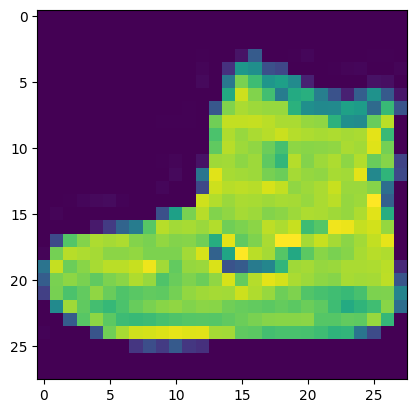

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train.shape

(60000,)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

In [ ]:
from keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
fashionMnist_parameters = train(X_train_flat, y_train, 5, [64], sigmoid, softmax, dsigmoid, d_cross_entropy, 0.001, adam)

In [ ]:
fashionMnist_parameters

{'W1': array([[ 8.38879649e-01,  1.44019609e-01,  2.65751661e-01, ...,
          6.74486898e-01,  5.32977048e-01,  1.32034955e-01],
        [ 9.41988168e-01,  2.19921101e-01, -9.36582080e+00, ...,
         -2.74078673e+01, -1.29132339e+01,  7.60047202e+00],
        [ 6.43922448e-01,  6.79641490e-02,  1.03424794e-01, ...,
          5.85853695e-01,  6.62184704e-01,  6.85290432e-01],
        ...,
        [ 7.23274190e-01,  3.09147602e-01,  4.68303051e-01, ...,
          7.40051250e-01,  9.37840545e-01,  6.52255889e-01],
        [ 7.47423546e-01,  2.47340740e-02,  3.55520381e-02, ...,
          6.30968545e-01,  7.19718002e-01,  5.21504904e-01],
        [ 3.15625551e-01,  5.86222809e-01,  1.95458537e-01, ...,
         -9.44823916e+00,  5.77019157e-01,  9.97034499e-01]]),
 'b1': array([  -4.07578159,  -28.61935033,   -7.08616354,   -7.36777967,
          -8.29936342,   -7.33414851,   -7.37198096,   10.3921396 ,
          -7.46948387,   -7.36859195,   -7.22520461,   -6.80147539,
          -9.

In [ ]:
Y_pred = []
error = 0
for i, x in enumerate(X_train_flat):
    y_pred = list(evaluate(x, fashionMnist_parameters, sigmoid, softmax))
    Y_pred.append(y_pred)
    error += cross_entropy(y_pred, y_train[i])
Y_pred = np.array(Y_pred)

In [ ]:
error

99762.56539697199

In [ ]:
Y_pred[1], y_train[0]

(array([3.11888105e-01, 1.00135541e-03, 3.06935809e-01, 2.64510755e-01,
        8.04388986e-03, 4.84695323e-06, 1.07332185e-01, 3.27140730e-18,
        2.82545318e-04, 5.08980598e-07]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# Torch Example

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NeuralNetwork, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(nn.Sigmoid())
        for i in range(1, len(hidden_layers)):
            layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(hidden_layers[-1], output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

def get_model_parameters(model):
    parameters = {}
    for name, param in model.named_parameters():
        parameters[name] = param.detach().numpy()
    return parameters

# Define the training function
def train(X, Y, epochs, hidden_layers, eta):
    input_size = X.shape[1]
    output_size = Y.shape[1]
    model = NeuralNetwork(input_size, hidden_layers, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=eta)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, torch.argmax(Y, axis=1))
        loss.backward()
        optimizer.step()


        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")
    return get_model_parameters(model)




In [ ]:
train(torch.tensor(X_train_flat, dtype = torch.float), torch.tensor(y_train), 50, [10], 0.01)

Epoch [0/50], Loss: 2.3760673999786377
Epoch [1/50], Loss: 2.374682903289795
Epoch [2/50], Loss: 2.3733203411102295
Epoch [3/50], Loss: 2.3719797134399414
Epoch [4/50], Loss: 2.3706603050231934
Epoch [5/50], Loss: 2.3693618774414062
Epoch [6/50], Loss: 2.368083953857422
Epoch [7/50], Loss: 2.366825819015503
Epoch [8/50], Loss: 2.3655872344970703
Epoch [9/50], Loss: 2.364367961883545
Epoch [10/50], Loss: 2.3631675243377686
Epoch [11/50], Loss: 2.361985921859741
Epoch [12/50], Loss: 2.3608219623565674
Epoch [13/50], Loss: 2.3596761226654053
Epoch [14/50], Loss: 2.358546495437622
Epoch [15/50], Loss: 2.3574347496032715
Epoch [16/50], Loss: 2.356339693069458
Epoch [17/50], Loss: 2.3552603721618652
Epoch [18/50], Loss: 2.3541975021362305
Epoch [19/50], Loss: 2.353149175643921
Epoch [20/50], Loss: 2.352116823196411
Epoch [21/50], Loss: 2.3510992527008057
Epoch [22/50], Loss: 2.3500959873199463
Epoch [23/50], Loss: 2.349107265472412
Epoch [24/50], Loss: 2.348132610321045
Epoch [25/50], Loss: 

{'model.0.weight': array([[ 0.02007801, -0.00095674,  0.01981417, ...,  0.03017884,
          0.0090047 ,  0.01546136],
        [-0.02657922, -0.02209734, -0.01582449, ..., -0.02080099,
         -0.00286483, -0.02735751],
        [ 0.03104339, -0.01770814,  0.02672025, ..., -0.01637515,
          0.02535692, -0.00684192],
        ...,
        [ 0.02562393,  0.01071797, -0.00856138, ...,  0.02821124,
         -0.01097845,  0.00296132],
        [ 0.01464097,  0.01743496,  0.02610424, ..., -0.0099863 ,
          0.02186127,  0.02554432],
        [ 0.02597991, -0.01841385,  0.01107014, ..., -0.0074371 ,
         -0.03376692,  0.03386039]], dtype=float32),
 'model.0.bias': array([-0.01970444, -0.01535579, -0.00285902,  0.03253584, -0.01917029,
        -0.02042463, -0.01664122,  0.01101663,  0.0060864 ,  0.0079527 ],
       dtype=float32),
 'model.2.weight': array([[-0.30799338,  0.09059213, -0.30312267, -0.10305741,  0.16375777,
         -0.12184444,  0.06322815, -0.27979755, -0.04788046,  